# Book Recommendation System

### Dataset used - Books, Users, Rating


In [8]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn import model_selection
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
# from surprise import Reader, Dataset
# from surprise import SVD, model_selection, accuracy
from collections import defaultdict
from sklearn import datasets
from sklearn import model_selection 
from sklearn.metrics import accuracy_score

###### Books Dataset

In [9]:
book_data = pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Books.csv")
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [10]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
book_data.shape

(271360, 8)

###### Users Dataset

In [12]:
users_data= pd.read_csv('E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Users.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users_data.shape

(278858, 3)

##### Ratings Dataset

In [15]:
ratings_data = pd.read_csv("E:\\DATA SCIENCE\\Book_Recommendation_System\\Book-Recommendation-System-main\\Ratings.csv")
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [17]:
ratings_data.shape

(1149780, 3)

### Data Cleaning And Feature Engineering

##### Books Data

In [18]:
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [21]:
pd.set_option('display.max_colwidth', -1)

ValueError: Value must be a nonnegative integer or None

In [22]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [23]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
dtype: int64


In [24]:
book_data.loc[(book_data['book_author'].isnull()),: ]
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [25]:
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [26]:
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [27]:
book_data.loc[221678]
book_data.loc[209538]
book_data.loc[220731]

isbn                                                          2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
book_author                                                         2003
year_of_publication                                            Gallimard
publisher              http://images.amazon.com/images/P/2070426769.0...
Name: 220731, dtype: object

In [28]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [29]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [30]:
book_data.loc[209538]
book_data.loc[221678]
book_data.loc[220731]

isbn                                              2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author                  Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication                                     2003
publisher                                          Gallimard
Name: 220731, dtype: object

In [31]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [32]:
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [33]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [34]:
pd.set_option('display.max_columns', None)  
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [35]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


##### Users Data

In [36]:
print(users_data.shape)

(278858, 3)


In [37]:
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [38]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [39]:
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [40]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

##### Ratings Data

In [41]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [42]:
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [43]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [44]:
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

### Data Viz

###### Books Data

Text(0.5, 1.0, 'Top 20 author with number of books')

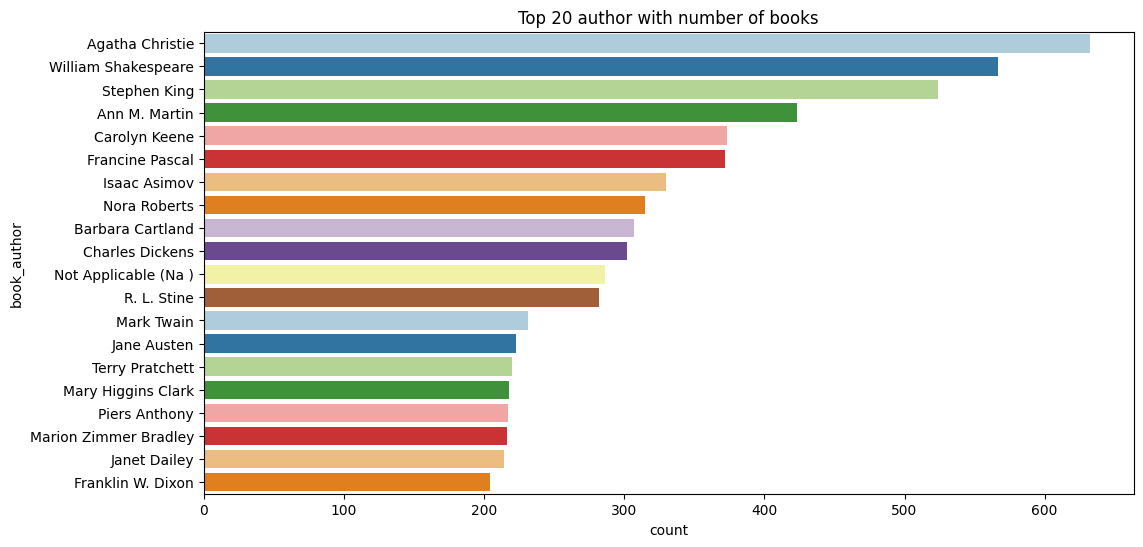

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

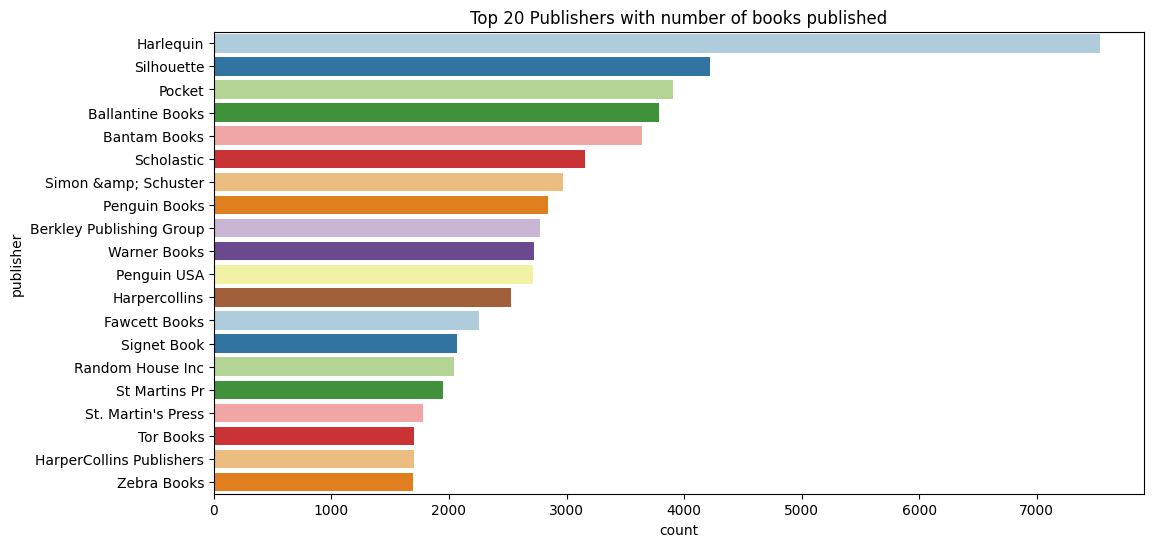

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

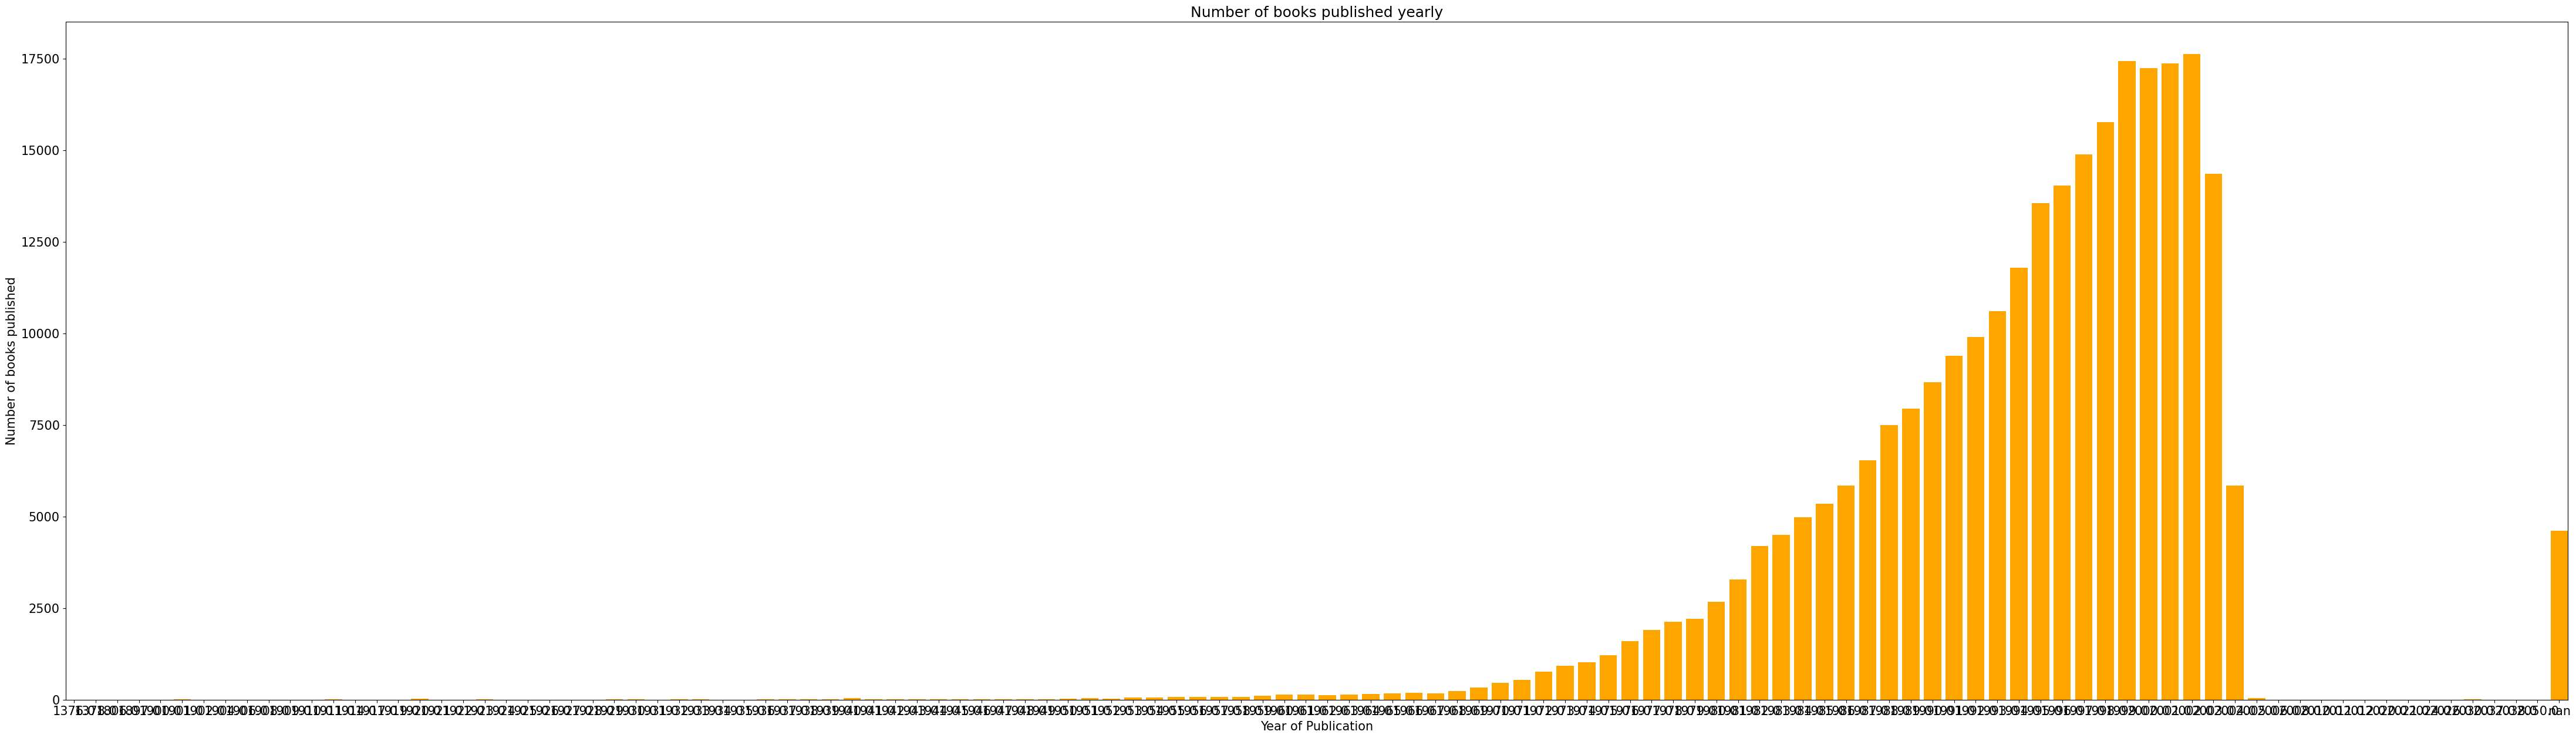

In [91]:
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'orange')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [48]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce') 
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()
print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


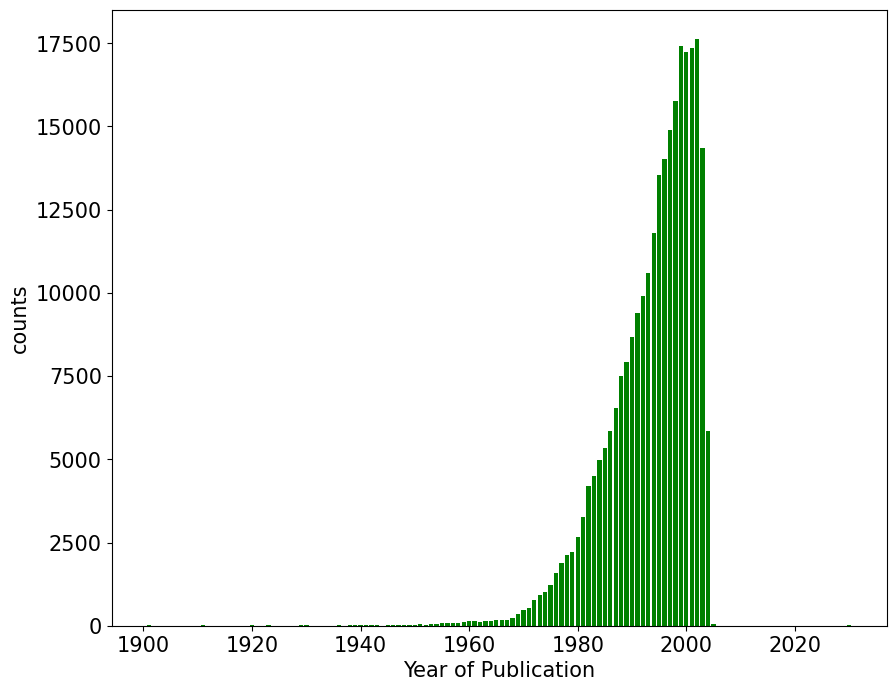

In [90]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values, color="green")
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

##### Users Data

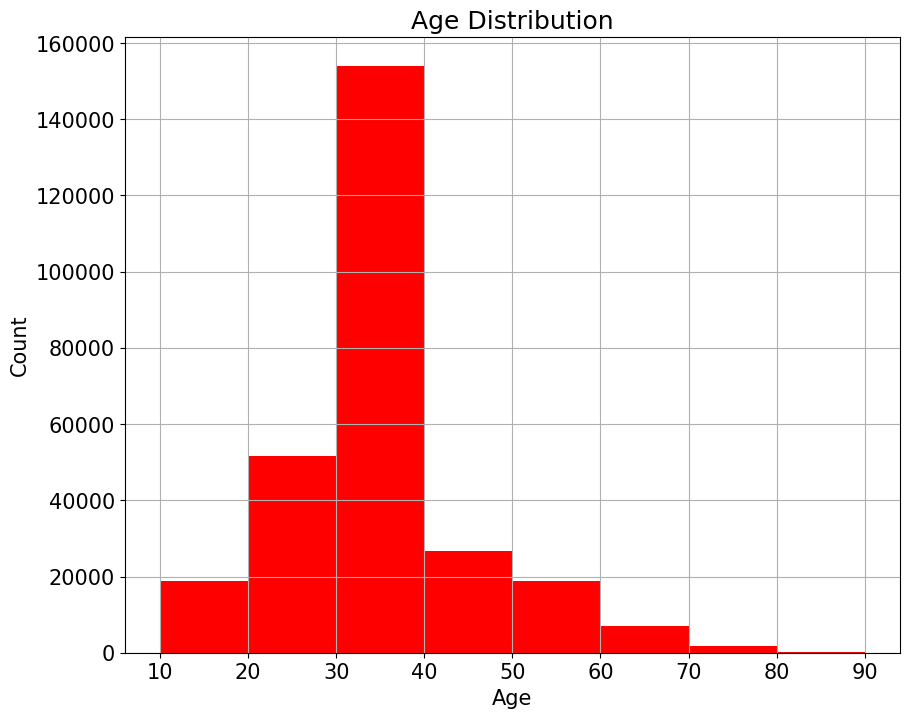

In [89]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'red')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

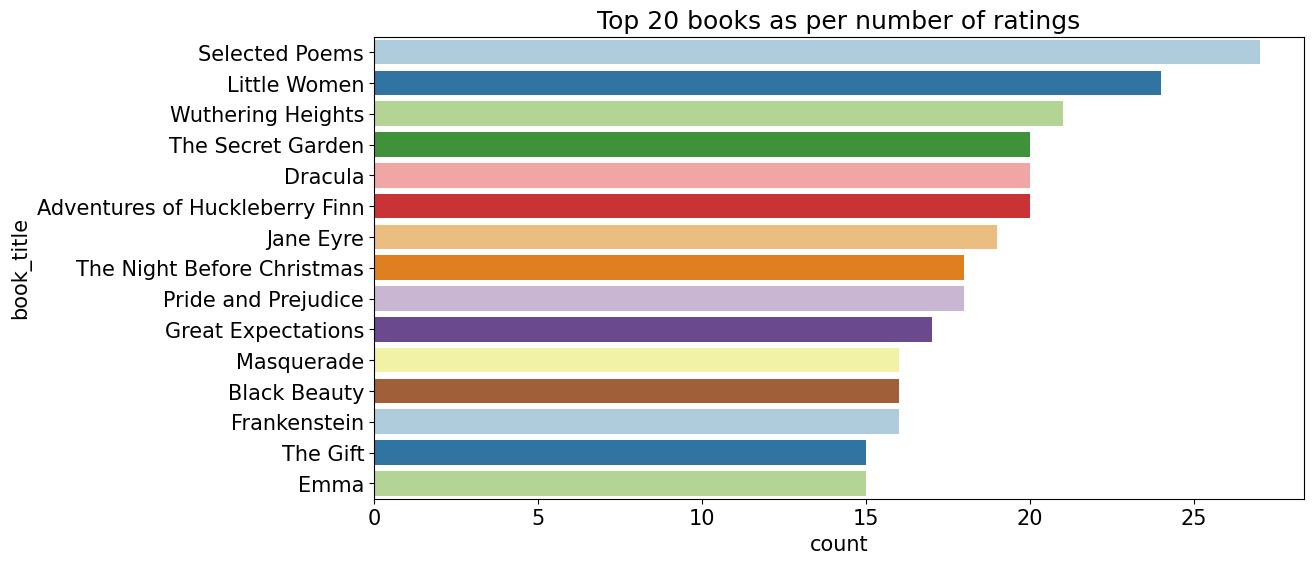

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<Axes: xlabel='book_rating', ylabel='count'>

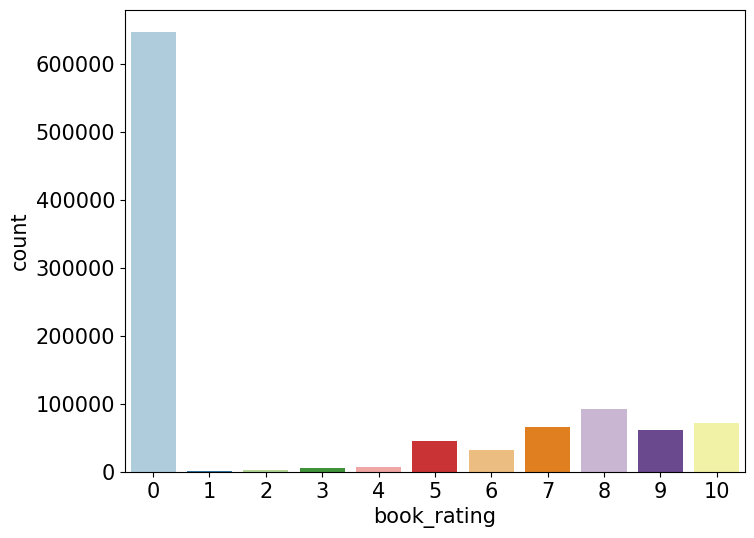

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

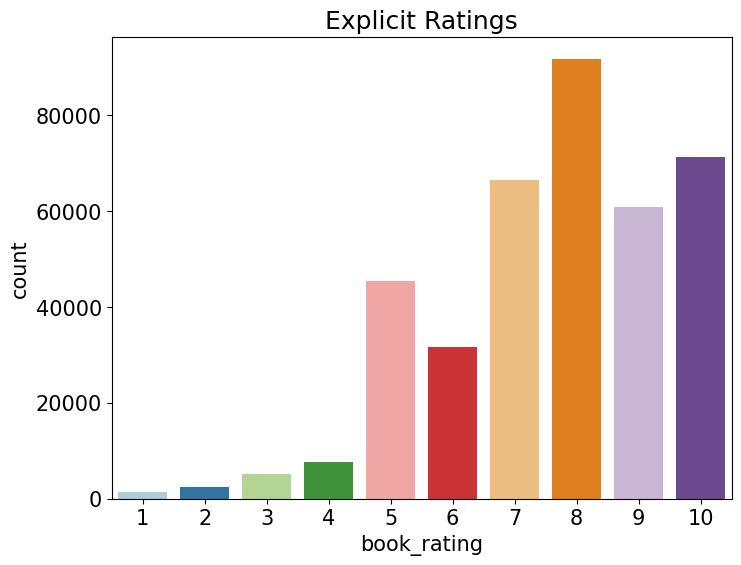

In [53]:
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

## Recommendation System

In [54]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [55]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [56]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [57]:
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [58]:
print(new_book_df.shape)

(383842, 7)


In [59]:
new_book_df['book_title'].count()

383842

In [60]:
new_book_df['book_title'].nunique()

135567

#### Top 15 Books

In [61]:
top_fifteen_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(15))
print('The top fifteen books as per ratings : ')
top_fifteen_books

The top fifteen books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


## Memory-Based Collaborative Filtering

#### Train-Test Split - 0.9-0.1

In [62]:
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [63]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [64]:
u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [65]:
u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [66]:
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

In [67]:
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

In [68]:
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [69]:
train_data.sample(5)
print("----------------------------------------------------------------------------------------------------------------")
test_data.sample(5)

----------------------------------------------------------------------------------------------------------------


,u_unique,i_unique,book_rating
72223,2920,2347,6
323622,622,13712,7
116133,2326,24771,7
234619,897,981,6
266134,10403,9894,10


#### User-Item for Train Data

In [70]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]

MemoryError: Unable to allocate 57.4 GiB for an array with shape (59738, 128984) and data type float64

In [71]:
train_matrix.shape

NameError: name 'train_matrix' is not defined

#### User-Item for Test Data

In [72]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [73]:
test_matrix.shape

(26058, 46725)

## Cosine Similarity Based Recommendation System

In [74]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

NameError: name 'train_matrix' is not defined

In [75]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [76]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

NameError: name 'train_matrix_small' is not defined

## Evaluation

In [77]:
def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

NameError: name 'item_prediction' is not defined

In [78]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings_explicit, reader)

NameError: name 'Reader' is not defined

In [79]:
model = SVD()
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

NameError: name 'SVD' is not defined

###### Train-Test

In [80]:
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)

NameError: name 'data' is not defined

In [81]:
predictions = model.test(testset)
print(f"The accuracy is {accuracy.rmse(predictions)}")

NameError: name 'model' is not defined

In [82]:
uid = 276744  
iid = '038550120X' 
pred = model.predict(uid, iid, verbose=True)

NameError: name 'model' is not defined

In [83]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.isbn==pred.iid)].book_rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

NameError: name 'pred' is not defined

In [84]:
def get_top_n(predictions, n=10):
    
    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [85]:
pred = model.test(testset)
top_n = get_top_n(pred)

NameError: name 'model' is not defined

In [86]:
pred_testset_df = pd.DataFrame(pred)
pred_testset_df

NameError: name 'pred' is not defined

In [87]:
def get_reading_list(userid):
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title = new_book_df.loc[new_book_df.isbn==book].book_title.unique()[0]
        reading_list[title] = rating
    return reading_list

In [88]:
example_reading_list = get_reading_list(userid=116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

NameError: name 'pred' is not defined